### Machine Learning SOPs 

In [22]:
#essential libraries  
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

#linear regression packages 
from sklearn.linear_model import LinearRegression # To build linear model for prediction
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # To check model performance
from sklearn.model_selection import train_test_split

#logistic regression packages 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve


#stats analysis 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [ ]:
# Removes the limit from the number of displayed rows.
pd.set_option("display.max_columns", None)

# Changes the limit of number of displayed columns to 200
pd.set_option("display.max_rows", 200)

import warnings
warnings.filterwarnings("ignore")

In [18]:
import random
random.randint(3,333)
random.random()
random.seed()

In [ ]:
STEP 0: READ THE FILE 
//
df= pd.read_csv('file_name.csv') #read csv
//
df= pd.read_excel('file_name.xlsx') #read excel pr json. sql
//
path= "https://archive.ics.uci.edu/ml/machine-learning-database/autos/imports-85.data"
df = pd.read_csv(path,header=None) #read html/url
headers = ['column name 1','column name 2',etc]
df.columns = headers #change header names 
//
df= pd.read_csv('file_name.txt', delimiter='\t') #read txt with separators, e.g. '\xx'
//
df= df.to_csv('modified.csv',index=False) #save csv to a path 
//
new_df = new_df.reset_index(drop=True, inplace=True) #reset index
//
data = df.copy() #saves a copy of the data, so that original is not affected 

In [ ]:
STEP 1: Understand the basic structure of the data and simple stats 
//
df.head() #insert the number of rows accordingly, otherwise it is by default 5 rows
df.tail() #last rows
//
np.random.seed(1) #sets the same random samples each time
df.sample(10).transpose() #random sample of 10 
//
df.shape #(r,c) 
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.') #r and c printed in full sentence 
//
df.info() #datatypes 
df.dtypes() #datatypes 
//
df.describe(include= 'all') #spread and distribution 

In [ ]:
Drop columns 

data.drop(columns=["ID"], inplace=True) # Dropping column - ID

In [ ]:
STEP 2: DEALING WITH UNITS & CHANGING DATA TYPES 

df['column name'] = df['column name'].astype('int') #apply a different data type to the whole column 
//
df['mpg'] = 235/df['mpg'] #converting miles per gallon into litters per 100km
df.rename(columns={'mpg': 'L/100km'},inplace=True) #renaming the column after converting the units
//
*Separation* 
df['column to be separated'].str.split(" ") #split the column name into different parts 
numeric_column = df['column to be separated'].str.split(" ", expand = True)[0].reset_index() #index accordingly 
numeric_column[0].value_counts() #identifies how many rows with null values 
fill = numeric_column[0].notna().mode()
fill
numeric_column[0].replace('null',1.0)
numeric_column[numeric_column[0].isna()]
//
df['column to be split'].apply(lambda x: split(" ")[0].lower()) #split according to index 
//
# identify columns with units 
modify_cols = []
for colname in df.columns[df.dtypes == 'object']:  # loop through string columns
    if df[colname].str.endswith('Lakh').any():  
        modify_cols.append(colname)
    elif df[colname].str.endswith('CC').any():  
        modify_cols.append(colname)
    elif df[colname].str.endswith('bhp').any():  
        modify_cols.append(colname)
    elif df[colname].str.endswith('kmpl').any():  
        modify_cols.append(colname)
        
df.[modify_cols]
//
*Replacement*
def obj_to_num(obj_val):
    
    if isinstance(obj_val, str) and obj_val.find('null') == -1:
        return float(obj_val.replace("kmpl", "").replace("Lakh", "").replace("bhp", "")
                     .replace("CC", "").replace("km/kg", "").replace("Cr", "")) 
    
    else: 
        return np.nan

for colname in modify_cols:
    df[colname] = df[colname].apply(obj_to_num)
    
df[modify_cols]

*Conversion* 
Cannot split and drop all units, in case some units need conversions 
//
data.columns =[col.replace(' ','_') for col in data.columns] #changing column names with spaces, dots, and hyphen 
data.columns =[col.replace('-','_') for col in data.columns]
data.columns =[col.replace('.','_') for col in data.columns]
//

In [ ]:
STEP 2: MISSING VALUES 
    axis = 0 : rows 
    axis = 1 : columns 
        inplace = True # modifies the data directly 
    
pd.DataFrame(data={"% of Missing Values": round(data.isna().sum() / data.isna().count() * 100, 2)}) #% of missing values

df.isna().sum().sort_values(ascending = False) #identify missing values, also isnull
//
df.drop(columns=['column name 1','column name 2'],axis=1,inplace=True) #drop columns, start df in new kernel 
df = df.drop(columns=['column name 1','column name 2'],axis=1) #same as above, as df is the new data after dropping
//
nan_df = df[df.isna().any(axis=0)] 
//
df = df.dropna(how='any') # drop any rows that contain NaN, or 'all'
//
mean = df['column name'].mean() #calculates mean of all values in the column 
df.['column name'].replace(np.nan, mean) #replaces the missing values (nan) with the mean (mean)
//
df.replace("?", np.nan, inplace = True) # replace "?" to NaN 
//
df.dropna(subset=["price"], axis=0, inplace=True)#drop the whole row for which missing values are target variables 
df.reset_index(drop=True, inplace=True)  # reset index, after dropping rows
//
df["new_price_num"] = df.groupby(["Brand", "Model"])["new_price_num"].transform(
    lambda x: x.fillna(x.median()) #fills in specific rows with the median of that category 
    
//
pd.DataFrame(data={"% of Missing Values": round(loan.isna().sum() / loan.isna().count() * 100, 2)}) #% of missing values


In [ ]:
Step 4: DATA TRANSFORMATION: NORMAL DISTRIBUTION (reducing a highly skewed distribution to a normal distribution)
    
sns.histplot(df['column_name'],kde=True) #see the distribution, and it is not normal distribution, or use sin, cos, tan
sns.histplot(np.log(df['column_name']),kde=True)#transform to normal distribution 
plt.xlabel("Log(column_name)")

df["column_name_log"] = np.log(df["column_name"]) #Creating a new column with the transformed variable after log 
plt.xlabel('Log(column_name)')
//

In [ ]:
Normalization: to make the variables comparable in range and scale
    
Xnew = df['length']

1. Simple feature scaling : Xold / Xmax (0-1)
df['length'] = df['length'] / df['length'].max()

2. Min-max : Xold - Xmin / Xmax - Xmin 
df['length'] = (df['length'] - df['length'].min()) / (df['length'].max() - df['length'].min())

3. Z-score : Xold - mean / SD 
df['length'] = (df['length'] - df['length'].mean()) / df['length'].std()

In [ ]:
Binning: grouping values into groups, converts numeric to cateogorical variables, groups a set into another big set 
    
bins = np.linspace(min(df['price'],max(df['price']),4)
group_names = ['Low', 'Medium', 'High']
df['priced_bins'] = pd.cut(pd.['price'],bins,labels=group_names,include_lowest=True
                           
//
#plot after binning                          
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df["horsepower"], bins = 3) # draw historgram of attribute "horsepower" with bins = 3

plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins") # set x/y labels and plot title

In [ ]:
One-hot encoding: turns categorical into quantifiable variables, assigns 1 or 0 in each cateogry 

dummy_variable = pd.get_dummies(df['fuel_type']) #get indicator variables and assign it to dataframe "dummy_variable"

dummy_variable.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True) #rename columns 

df = pd.concat([df, dummy_variable], axis=1) # merge dataframe "df" and "dummy_variable" 

df.drop("fuel_type", axis = 1, inplace=True) # drop original column "fuel-type" from "df"

In [ ]:
# pairplot 
sns.pairplot()

#boxplot 
sns.boxplot(x='column name 1',y='column name 2',data=df)

#scatter plot 
x = df['predictor_variable']
y = df['target_variable']
plt.scatter(x,y)

plt.title('')
plt.xlabel('')
plt.ylabel('')

#heat map 
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") #correlation b/w numeric variables only 

In [ ]:
# linear regression model building 


coef_df = pd.DataFrame(np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_), \ 
                       index=x_train2.columns.tolist()+['Intercept'], 
                       columns=['Coefficients']) #the coefficients and intercept of the model


In [ ]:
#access values 

df.columns #all columns 
//
df['column name'] #all rows of a specific column 
df[['column name 1','column name 2']] #all rows of multiple columns 
df['column name'][10:21] #all rows of multiple columns in a range 
//
df.iloc[10] #all columns of a specific row 
df.iloc[10:20] #multiple rows within a range 
df.iloc[10,5] #the specific column of a specific row
//
for index, row in df.iterrows():
    print (index, row) #row by row 
for index, row in df.iterrows():
    print (index, row['column name']) #rows from a specific column with an index 
//
df.loc[df['column name'] == 'specific row'] #all the columns with a specific row of a specific column 
df.loc[(df['column 1'] == 'row name 1') & (df['column 2'] == 'row name 2') & so on] #and 
//
df.loc[(df['column 1'] == 'row name 1') | (df['column 2'] == 'row name 2') | so on] #or 
//
df.loc[df['column name'].str.contains('letters')] #returns all rows in columns that contain 'letters'
df.loc[~df['column name'].str.contains('letters')] #drops rows with names that contain 'letters'
//
df.loc[df['column name'].str.contains('row 1|row 2')
//
df.loc[df['column name'] == 'row name','column name']  = 'new row name' #changing name of a specific row in a column 
//
df.loc[df['column name'] > number, ['row 1','row 2']] = ['row name under row 1','row name under row 2']
//
df.sort_values('column name',ascending=False) #sort the rows alphabetically in a column 
df.sort_values(['column name 1','column name 2'],ascending=[1,0]) #sort multiple rows alphabetically or numerically 
//
df[df['column name']== 'row name'] #returns all the rows with the name
//
df[df["column name"].str.startswith("Specific Name")] #returns rows that start with 'Specific Name'

In [ ]:
#groupby: groups categorical variables, into categories, single or multiple

df[['numeric variable','category']].groupby(['category'],as_index= False).mean()
df_pivot = df_grp.pivot(index='sub_category',columns='category')
//
plt.pcolor(df_pivot, cmap='RaBu') #representing the grouped info from above using heatmap 
plt.colorbar()
plt.show()
//
df.groupby(['column 1 as a category'])['column 2 as numeric value'].mean().sort_values('column 2',ascending=True) #also sort by count, sum 
//
df.groupby(['column 1','column 2']).count()['column 3']

In [ ]:
df['New column name'] = df['column 1'] + df['column 2'] + ... #adding up multiple similar numerical columns to form a new column
df['New column name'] = df.iloc[:,5:10].sum(axis=1) #adding up a column range to form a new column with all rows 
//

In [ ]:
# counting rows in a given column 

df['column name'].value_counts() #gives the values of all the rows in descending order 
df.column_name.value_counts().index #ranks the rows in descending order without giving the values 

# countplot 

sns.countplot(y='column name',data=df) #plots the graph on the y-axis, giving full space for the names 
sns.countplot(order=df['column name'].value_counts().index[::-1]) #in ascending level of popularity

In [ ]:
#chi square testing: association of 2 categorical variables 

scipy.stats.chi2_contingency(cont_table, correlation = True)


crosstab = pd.crosstab(loan['Income'],loan['Personal_Loan'])  # Contingency table of region and smoker attributes

Ho = "Income has no effect on Personal Loan"   # Stating the Null Hypothesis
Ha = "Income has an effect on Personal Loan"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot
    

plt.figure(figsize=(10,5))
ax = sns.countplot(loan["Education"],palette='winter')
perc_on_bar(ax,loan["Education"])

In [ ]:
## Function to plot stacked bar chart

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,loan['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,loan['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()
    
stacked_plot(loan['Family'])

In [ ]:
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    
histogram_boxplot(loan["Experience"])

In [ ]:
#simple linear regression model

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

x =df['predictor_variable']
y =df['target_variable']

lm.fit(x, y)
yhat = lm.predict(x)

lm.intercept_
lm.coef_

#multiple linear regression model 



In [102]:
#numpy 

a = np.array([1,2,3],dtype='int16')

b = np.array([[9.0,8.0,7.0],[6.0,5.0,4.0]],dtype='float64')

In [103]:
#dimension 
a.ndim

#shape
b.shape

#type & size 
b.dtype
b.itemsize
b.nbytes

48

In [108]:
a = np.array([[1,2,3,4,5,6,7],[8,9,10,11,12,13,14]])
print(a)

[[ 1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14]]


In [139]:
a[1,5] #specific element [r,c]
a[1,-2] #count backwards 

a[0,:] #specific row 

a[:,2] #specific column

a[0,1:6:2] #startindex:endindex:stepsize
a[0,1:-1:2] #backwards 

a[1,5] =20 #change element 
a[:,2]= [45]

b = np.array([[[1,2],[3,4]],[[5,6],[7,8]]])
print(b)

b[0,1,1] #work outside in, 0 is for the first array 

b[:,0,1] #: is for both arrays, 0 applies to the first row for BOTH arrays, 1 applies to index 1 of that row  

b[:,1,:] = [[8,10],[9,20]] #replace 

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [179]:
# all 0s matrix 

np.zeros((2,3,3))
         
# all 1s matrix 
np.ones((4,2,2),dtype='int16')

#any other number 
np.full((2,2),99,dtype='float16')

np.full(a.shape,4) #same as below 
np.full_like(a,4) #full_like 

array([[4, 4, 4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4, 4, 4]])

In [231]:
# random decimal numbers 
np.random.rand(4,3)

# random integers 
np.random.randint(10,82,size=(9,9))

# identity matrix 
np.identity(3)

# repeat an array 
arr = np.array([[1,2,3]])
r1 = np.repeat(arr,3,axis=1) #axis = 1 shows one row , axis = 0 shows all columns 

# making an 5x5 array, with 1s and a 9 in the middle 
output = np.zeros((5,5))

z = np.ones((3,3))
z[1,1] = 9 

output[1:-1,1:-1] = z 
output 

# copying arrays 
a = np.array([1,2,3])
b = a.copy() #otherwise, a will be equal to b too 
b[0] =100

In [243]:
a = np.array([1,2,3,4])

a + 2 
a - 2
a * 2
a / 2
a ** 2 

b = np.array([1,0,6,9])

a + b

np.sin(a) #cos & tan

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [248]:
# linear algrebra 

a = np.ones((2,3))
a

b =np.full((3,2),2)
b

np.matmul(a,b) #matrix multiplication 

c = np.identity(3)
np.linalg.det(c) #determinant 

1.0

In [256]:
# stats 
stats = np.array([[1,2,3],[4,5,6]])
stats 

np.min(stats,axis=0)
np.max(stats,axis=1)
np.sum(stats,axis=0


array([5, 7, 9])

In [263]:
before = np.array([[1,2,3,4],[5,6,7,8]])
before

after = before.reshape((2,2,2))
after

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [280]:
# vertically stacking vectors, number of columns must be the same 
v1 = np.array([1,2,3,4])
v2 = np.array([5,6,7,8])

np.vstack([v1,v2,v2,v1,v1,v2])

# horizontal stacking, number of rows must match 

h1 = np.ones((2,4))
h2 = np.zeros((2,8))

np.hstack([h1,h2])

array([[1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
#load data 
filedata = np.genfromtext('filename.txt',delimiter=',')
filedata.astype('int32')
filedata = filedata.astype('int32')

#boolean masking and advanced indexing 
filedata >= 50 # returns False or True 
filedata[filedata > 50] # returns the wanted values that are True 

a = np.array([1,2,3,4,5,6,7,8,9])
a[[1,2,8]]

np.any(filedata > 50, axis=0)
np.all(filedata >= 50, axis=1)

((filedata > 50) & (filedata < 100))
(~((filedata > 50) & (filedata < 100)))


In [235]:
# for loops : definite iterations 

def main():
    for i in range(4): #4 iterations of the three actions in the body statement, executes on number of times 
        put_beeper()
        move()
        turn_left()
        
# while loops: indefinite loop, the condition is checked at the start and at the end before checking again 
# while loops: pre and post conditions are the same, so it can be repeated when checked again
# infinite loop: never ends 

def main():
    while front_is_clear(): #execute the statements as long as condition is true, executes on bolean 
        put_beeper()
        move()
    put_beeper() #not in the body statement, thus executes when condition is false # fence post problem 
    
# if-else statements # only one of the conditions that verifies as true will be executed 

    #gd function: does one conceptual thing, descriptive name that does as such, indented 3 levels, few than 10 lines
    #gd function: reusable, easily modifiable, well commented 
    
def main(): 
    if front_is_clear():
        move()
    elif: 
        pick_beeper()
    else:
        put_beeper()
        
input = input('What is your name?')

In [ ]:
# styling of plots 

fmt='[color][marker][line]'
color='skyblue' or 'y' or '#ababab'
palette='twilight'
lw=4 #thickness of line around bar 
ec='black' #color of line around bar 
hatch='/' #pattern on the bar 
marker='.'
markersize
markeredgecolor
line

fontdict={'fontname':'Comic Sans MS','fontsize':50} #font type and size 
nice fonts:Bradley Hand;Chalkduster;DIN Alternate;Silom;Skia;
    Zapfino;Arial Rounded MT Bold;Apple Chancery;Herculanum;Trattatello

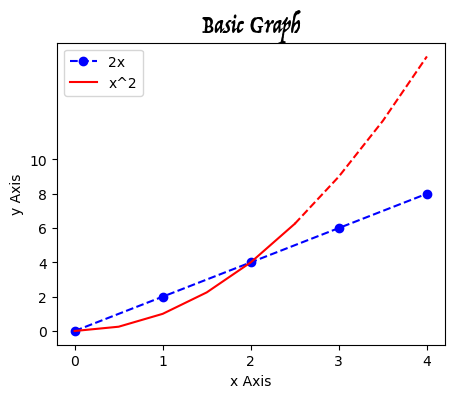

In [74]:
#basic graph 

x=[0,1,2,3,4]
y=[0,2,4,6,8]

# resize graph with dpi, the resolution 
plt.figure(figsize=(5,4),dpi=100)

#line 1, fmt, keyward argument notation, separate with commas 
plt.plot(x,y,'bo--',label='2x')

#line 2, with interval 
x2=np.arange(0,4.5,0.5)
#plot part of graph as line 
plt.plot(x2[:6],x2[:6]**2,"r",label='x^2')
#plot part of graph as dot 
plt.plot(x2[5:],x2[5:]**2,'r--')

#title 
plt.title('Basic Graph',fontdict={'fontname':'Trattatello','fontsize':18})
#axis labels
plt.xlabel('x Axis')
plt.ylabel('y Axis')
#axis scale 
plt.xticks([0,1,2,3,4])
plt.yticks([0,2,4,6,8,10])
#legend 
plt.legend()
#can save with a different dpi 
plt.savefig('basicgraph.png',dpi=500)
#show
plt.show()

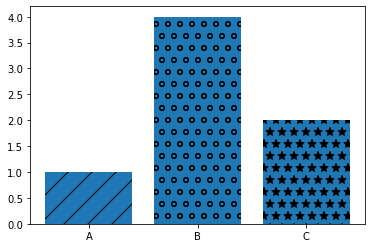

<Figure size 360x216 with 0 Axes>

In [76]:
#bar chart 

labels = ['A','B','C']
values = [1,4,2]

bars = plt.bar(labels,values)

#patterns one by one 
bars[0].set_hatch('/')
bars[1].set_hatch('o')
bars[2].set_hatch('*')

#or for loop patterns 
patterns = ['/','o','*']
for bar in bars: 
    bar.set_hatch(patterns.pop(0))

plt.figure(figsize=(5,3))

plt.show()